In [4]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def clean_data(data):
    # Handling duplicates
    duplicates = data.duplicated().sum()
    print("Number of duplicated data:", duplicates)
    data = data.drop_duplicates()

    # Handling missing values
    null_values = data.isna().sum()
    print("Number of null data:")
    print(null_values)
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop rows with null values in the 'Date' column
    data = data.dropna(subset=['Date'])

    # Drop rows with 'NaT' values in the 'Date' column
    data = data.drop(data[data['Date'].isna()].index)

    
    return data

In [6]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\fcds\ds methedology\dsm final project\walmart-sales-dataset-of-45stores.csv")
data = clean_data(data)
print(data.head())

Number of duplicated data: 0
Number of null data:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
4      1 2010-05-03    1554806.68             0        46.50       2.625   
5      1 2010-12-03    1439541.59             0        57.79       2.667   
8      1 2010-02-04    1594968.28             0        62.27       2.719   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
4  211.350143         8.106  
5  211.380643         8.106  
8  210.820450         7.808  


C:\Users\DELL\AppData\Local\Temp\ipykernel_5640\4228533522.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_sales_per_store.index, y=total_sales_per_store.values, legend=False, palette='viridis')


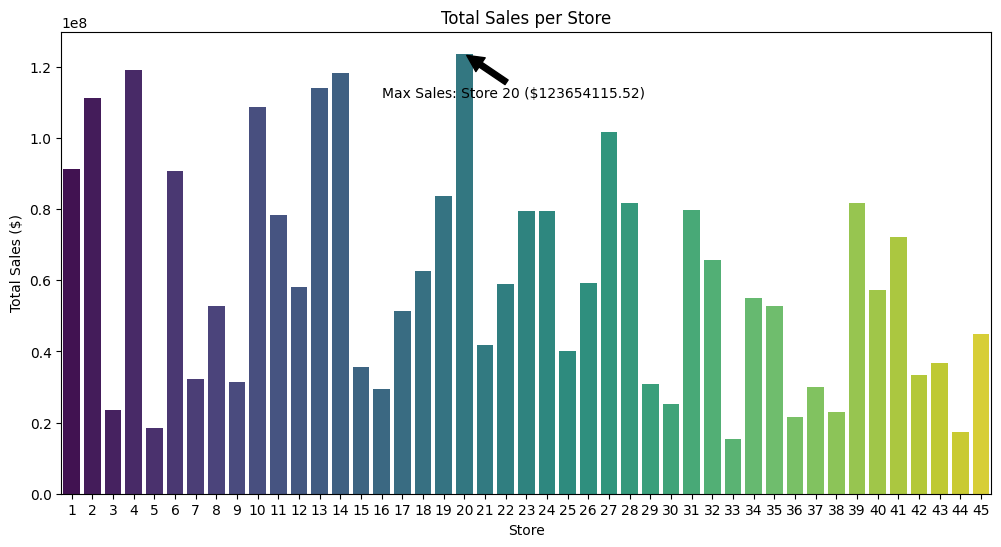

Store with Max Sales: Store 20


In [7]:
def plot_total_sales_per_store():
    total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum()
    max_sales_store = total_sales_per_store.idxmax()
    max_sales = total_sales_per_store.max()
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=total_sales_per_store.index, y=total_sales_per_store.values, legend=False, palette='viridis')
    ax.annotate(f'Max Sales: Store {max_sales_store} (${max_sales:.2f})', 
                xy=(max_sales_store - 1, max_sales), 
                xytext=(max_sales_store - 5, max_sales * 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.title('Total Sales per Store')
    plt.xlabel('Store')
    plt.ylabel('Total Sales ($)')
    plt.show()
    print(f"Store with Max Sales: Store {max_sales_store}")
    
plot_total_sales_per_store()


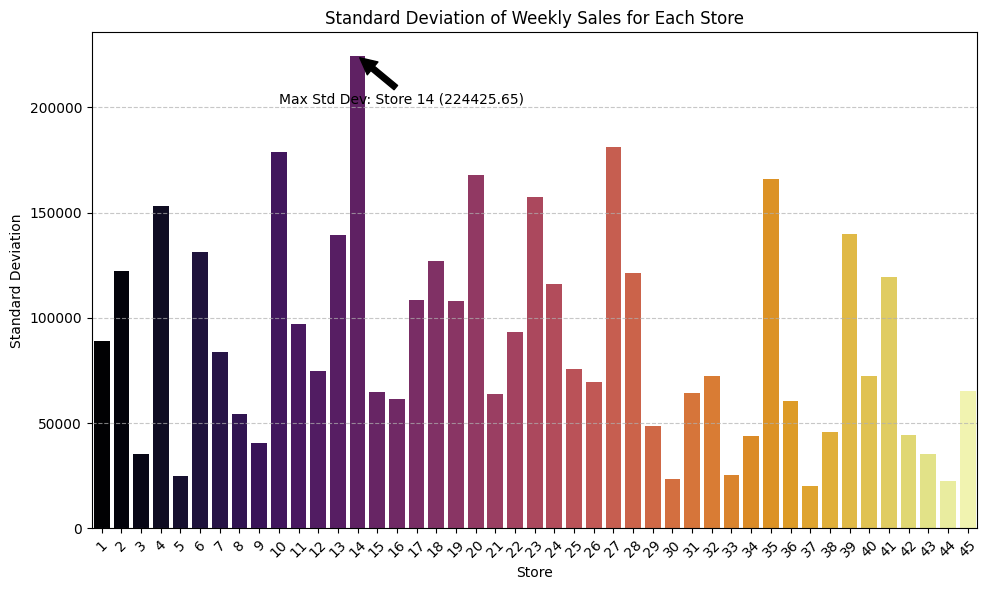

Store with Max Std Dev: Store 14


In [8]:
def plot_std_dev_per_store():
    std_dev_per_store = data.groupby('Store')['Weekly_Sales'].std()
    max_std_dev_store = std_dev_per_store.idxmax()
    max_std_dev = std_dev_per_store.max()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=std_dev_per_store.index, y=std_dev_per_store.values, hue=std_dev_per_store.index, legend=False, palette='inferno')
    ax.annotate(f'Max Std Dev: Store {max_std_dev_store} ({max_std_dev:.2f})', 
                xy=(max_std_dev_store - 1, max_std_dev), 
                xytext=(max_std_dev_store - 5, max_std_dev * 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.title('Standard Deviation of Weekly Sales for Each Store')
    plt.xlabel('Store')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(f"Store with Max Std Dev: Store {max_std_dev_store}")
    
plot_std_dev_per_store()


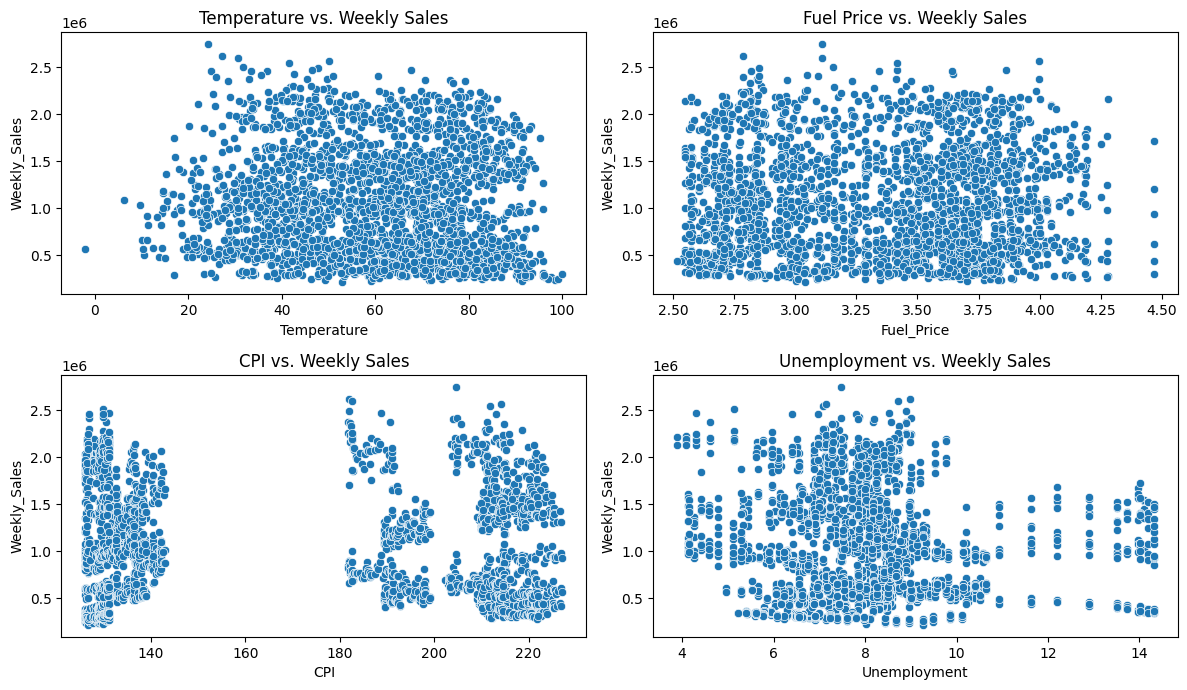

In [9]:
def plot_relations():
    plt.figure(figsize=(12, 10))
    plt.subplot(3, 2, 1)
    sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
    plt.title('Temperature vs. Weekly Sales')
    plt.subplot(3, 2, 2)
    sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
    plt.title('Fuel Price vs. Weekly Sales')
    plt.subplot(3, 2, 3)
    sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
    plt.title('CPI vs. Weekly Sales')
    plt.subplot(3, 2, 4)
    sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
    plt.title('Unemployment vs. Weekly Sales')
    plt.tight_layout()
    plt.show()
    
plot_relations()

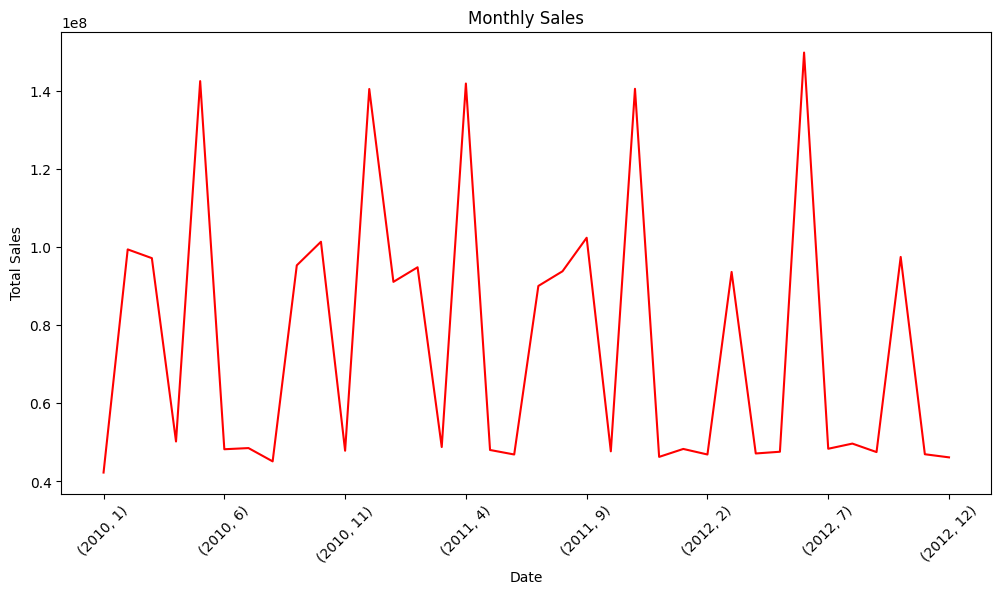

In [10]:
def plot_monthly_sales():
    try:
        if 'Date' not in data.columns:
            raise ValueError("Date column not found in the dataset.")
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
        data['Month'] = data['Date'].dt.month
        data['Year'] = data['Date'].dt.year
        monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum()
        plt.figure(figsize=(12, 6))
        monthly_sales.plot(kind='line', color='red')
        plt.title('Monthly Sales')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.show()
    except Exception as e:
        print("Error:", str(e))
        
plot_monthly_sales()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5640\337633023.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  semester_sales = data.groupby(['Year', 'Semester'])['Weekly_Sales'].sum()


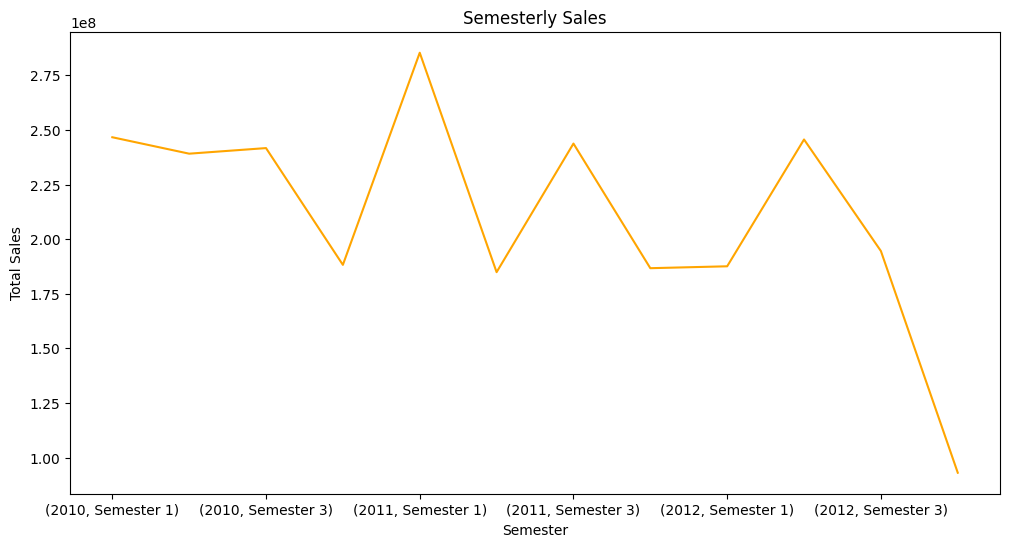

In [14]:
def plot_semesterly_sales():
    try:
        if 'Date' not in data.columns:
            raise ValueError("Date column not found in the dataset.")
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
        data['Month'] = data['Date'].dt.month
        data['Year'] = data['Date'].dt.year
        data['Semester'] = pd.cut(data['Month'], bins=[1, 4, 7, 10, 12], labels=['Semester 1', 'Semester 2', 'Semester 3', 'Semester 4'])
        semester_sales = data.groupby(['Year', 'Semester'])['Weekly_Sales'].sum()
        plt.figure(figsize=(12, 6))
        semester_sales.plot(kind='line', color='orange')
        plt.title('Semesterly Sales')
        plt.xlabel('Semester')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=0)
        plt.show()
    except Exception as e:
        print("Error:", str(e))
        
plot_semesterly_sales()

In [12]:
def analyze_holiday_sales():
    try:
        holiday_sales = data[data['Holiday_Flag'] == 1]
        holiday_sales = holiday_sales.dropna(subset=['Date'])  # Drop rows with NaT in the 'Date' column
        non_holiday_sales_mean = data[data['Holiday_Flag'] == False]['Weekly_Sales'].mean()
        high_sales_holidays = holiday_sales[holiday_sales['Weekly_Sales'] > non_holiday_sales_mean]
        print("Holidays with higher sales than the mean sales in the non-holiday season:")
        print(high_sales_holidays[['Date', 'Weekly_Sales']])
    except Exception as e:
        print("Error:", str(e))
analyze_holiday_sales()

Holidays with higher sales than the mean sales in the non-holiday season:
           Date  Weekly_Sales
1    2010-12-02    1641957.44
31   2010-10-09    1507460.69
53   2011-11-02    1649614.93
83   2011-09-09    1540471.24
105  2012-10-02    1802477.43
...         ...           ...
5751 2010-10-09    1172672.27
5773 2011-11-02    1150003.36
5803 2011-09-09    1280958.97
5825 2012-10-02    1238844.56
5855 2012-07-09    1392143.82

[122 rows x 2 columns]


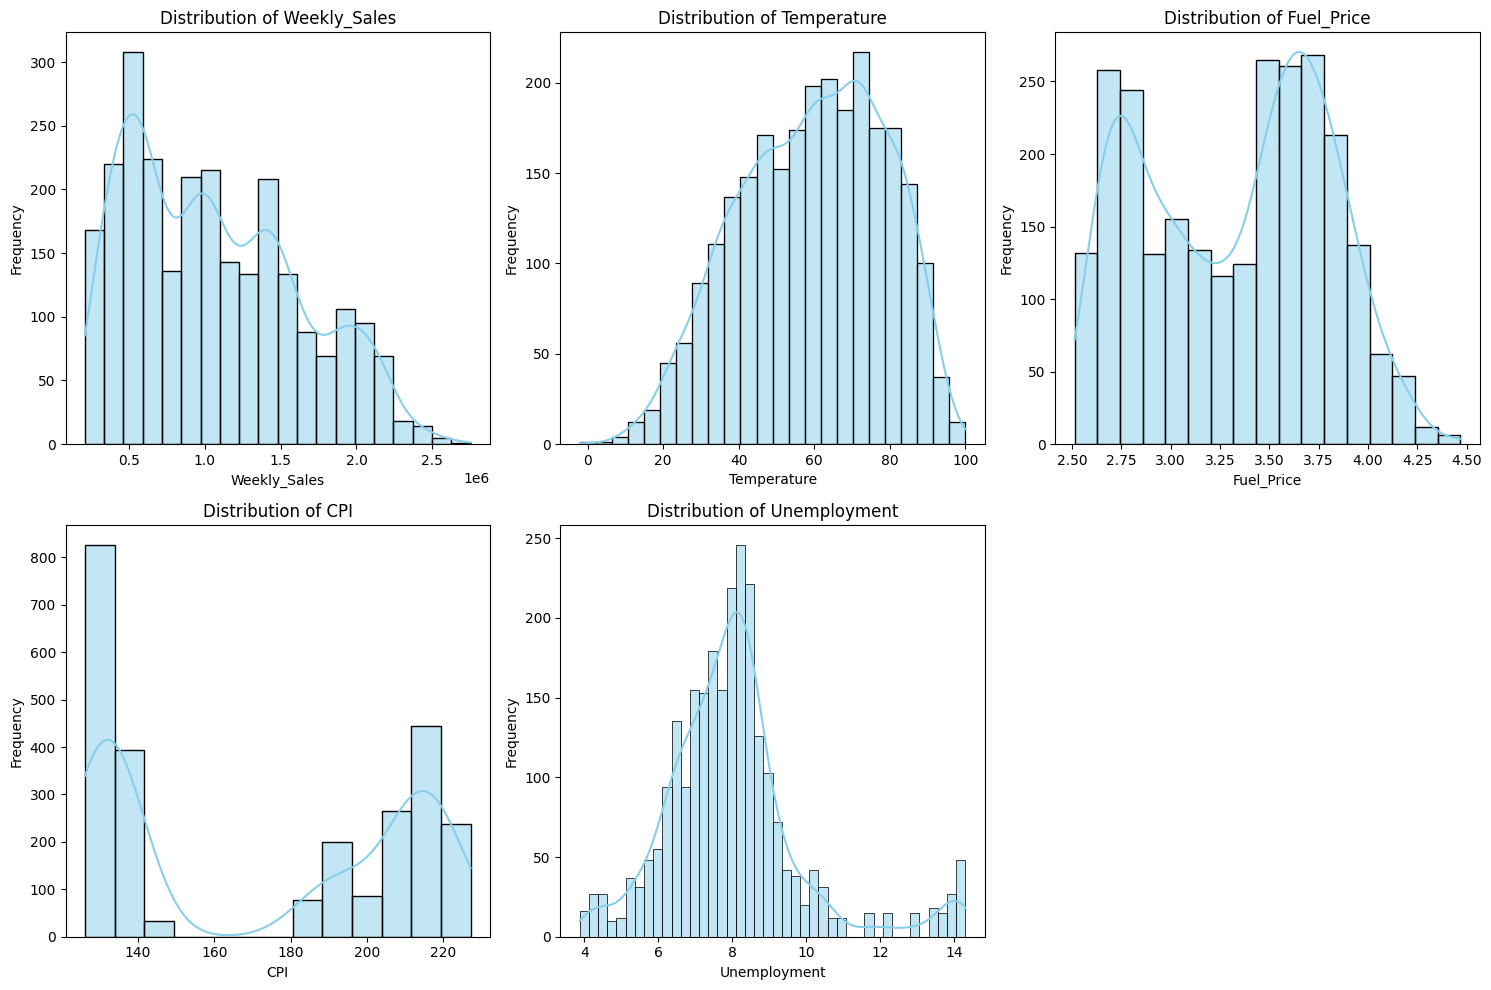

In [13]:
def plot_quantitative_variable_distributions():
    # Visualize the distributions of quantitative variables
    quantitative_vars = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(quantitative_vars, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[var], kde=True, color='skyblue')
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
plot_quantitative_variable_distributions()